In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import kurtosis
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

In [159]:
insurance_claims = pd.read_csv('insurance_claims.csv')

In [160]:
insurance_claims

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [ ]:
# first 20 rows to csv file
insurance_claims.head(20).to_csv('insurance_claims_head.csv')

In [115]:
selected_columns = insurance_claims[['months_as_customer', 'age', 'policy_state', 'insured_sex', 'insured_education_level','insured_occupation', 'auto_make', 'auto_model', 'auto_year', 'total_claim_amount']]

In [116]:
selected_columns

,months_as_customer,age,policy_state,insured_sex,insured_education_level,insured_occupation,auto_make,auto_model,auto_year,total_claim_amount
0,328,48,OH,MALE,MD,craft-repair,Saab,92x,2004,71610
1,228,42,IN,MALE,MD,machine-op-inspct,Mercedes,E400,2007,5070
2,134,29,OH,FEMALE,PhD,sales,Dodge,RAM,2007,34650
3,256,41,IL,FEMALE,PhD,armed-forces,Chevrolet,Tahoe,2014,63400
4,228,44,IL,MALE,Associate,sales,Accura,RSX,2009,6500
...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,FEMALE,Masters,craft-repair,Honda,Accord,2006,87200
996,285,41,IL,FEMALE,PhD,prof-specialty,Volkswagen,Passat,2015,108480
997,130,34,OH,FEMALE,Masters,armed-forces,Suburu,Impreza,1996,67500
998,458,62,IL,MALE,Associate,handlers-cleaners,Audi,A5,1998,46980


In [117]:
selected_columns['total_claim_amount'].describe()

count      1000.00000
mean      52761.94000
std       26401.53319
min         100.00000
25%       41812.50000
50%       58055.00000
75%       70592.50000
max      114920.00000
Name: total_claim_amount, dtype: float64

In [118]:
data = selected_columns[['total_claim_amount']]

In [119]:
skewness = stats.skew(data)

In [120]:
kurtosis = stats.kurtosis(data)

In [121]:
print("skewness:",skewness)

skewness: [-0.59368974]


In [122]:
print("Kurtosis:",kurtosis)

Kurtosis: [-0.4578082]


In [123]:
correlation_matrix = np.corrcoef(data, rowvar = False)

In [124]:
print("Correlation matrix:",correlation_matrix)

Correlation matrix: 1.0


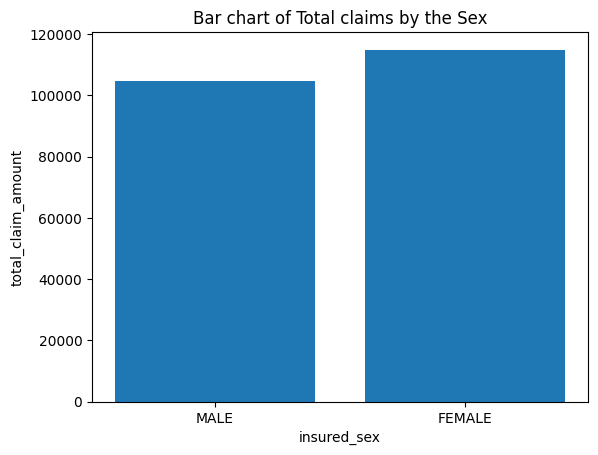

In [125]:
x_values = selected_columns['insured_sex']
y_values = selected_columns['total_claim_amount']
plt.bar(x_values,y_values)
plt.xlabel('insured_sex')
plt.ylabel('total_claim_amount')
plt.title('Bar chart of Total claims by the Sex')
plt.show()

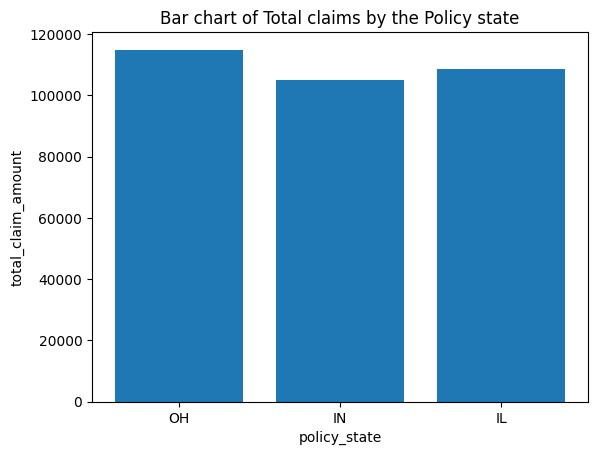

In [126]:
x_values = selected_columns['policy_state']
y_values = selected_columns['total_claim_amount']
plt.bar(x_values,y_values)
plt.xlabel('policy_state')
plt.ylabel('total_claim_amount')
plt.title('Bar chart of Total claims by the Policy state')
plt.show()

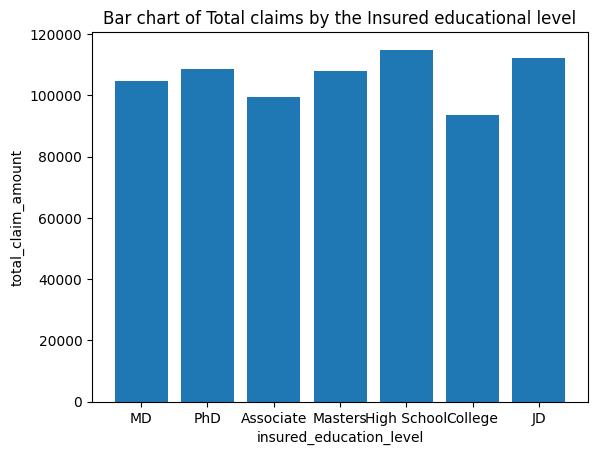

In [127]:
x_values = selected_columns['insured_education_level']
y_values = selected_columns['total_claim_amount']
plt.bar(x_values,y_values)
plt.xlabel('insured_education_level')
plt.ylabel('total_claim_amount')
plt.title('Bar chart of Total claims by the Insured educational level')
plt.show()

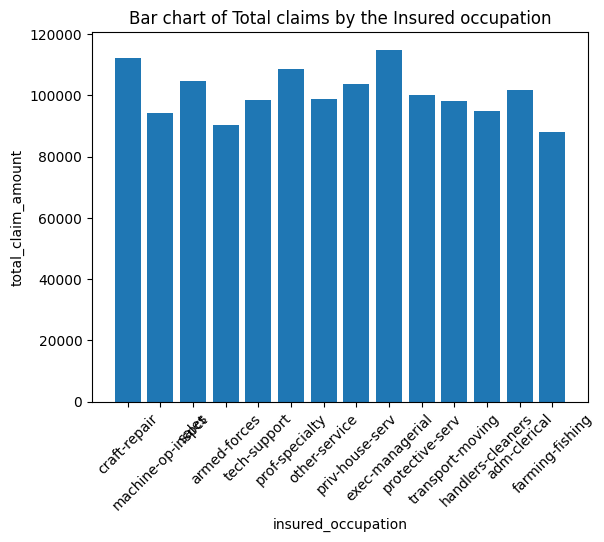

In [128]:
x_values = selected_columns['insured_occupation']
y_values = selected_columns['total_claim_amount']
plt.bar(x_values,y_values)
plt.xlabel('insured_occupation')
plt.ylabel('total_claim_amount')
plt.xticks(rotation=45)
plt.title('Bar chart of Total claims by the Insured occupation')
plt.show()

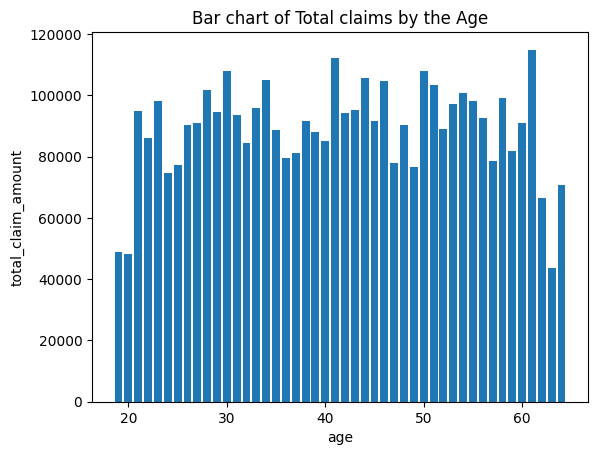

In [129]:
x_values = selected_columns['age']
y_values = selected_columns['total_claim_amount']
plt.bar(x_values,y_values)
plt.xlabel('age')
plt.ylabel('total_claim_amount')
plt.title('Bar chart of Total claims by the Age')
plt.show()

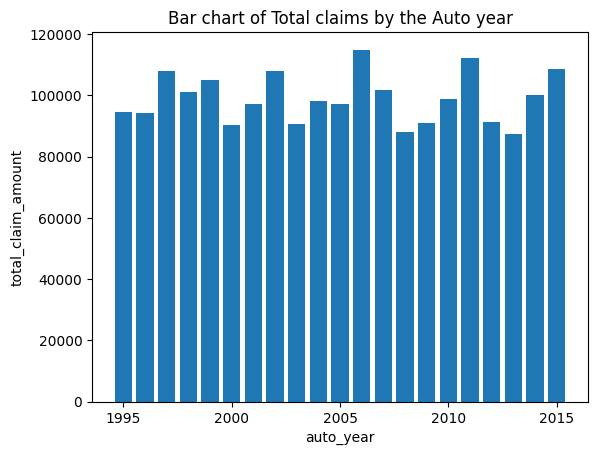

In [130]:
x_values = selected_columns['auto_year']
y_values = selected_columns['total_claim_amount']
plt.bar(x_values,y_values)
plt.xlabel('auto_year')
plt.ylabel('total_claim_amount')
plt.title('Bar chart of Total claims by the Auto year')
plt.show()

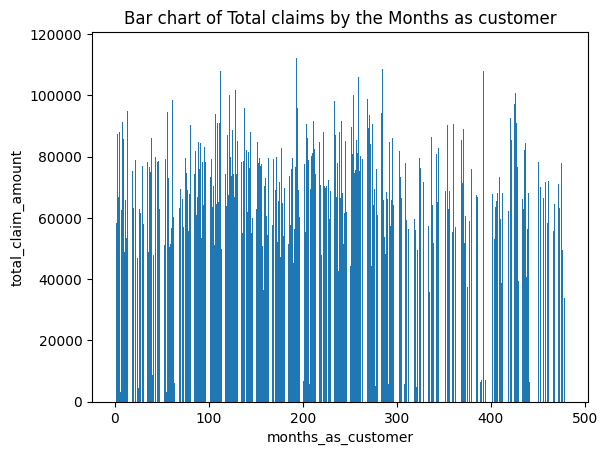

In [131]:
x_values = selected_columns['months_as_customer']
y_values = selected_columns['total_claim_amount']
plt.bar(x_values,y_values)
plt.xlabel('months_as_customer')
plt.ylabel('total_claim_amount')
plt.title('Bar chart of Total claims by the Months as customer')
plt.show()

In [132]:
fig = px.scatter(selected_columns, x= 'months_as_customer', y='total_claim_amount',trendline = 'ols')
fig.show()

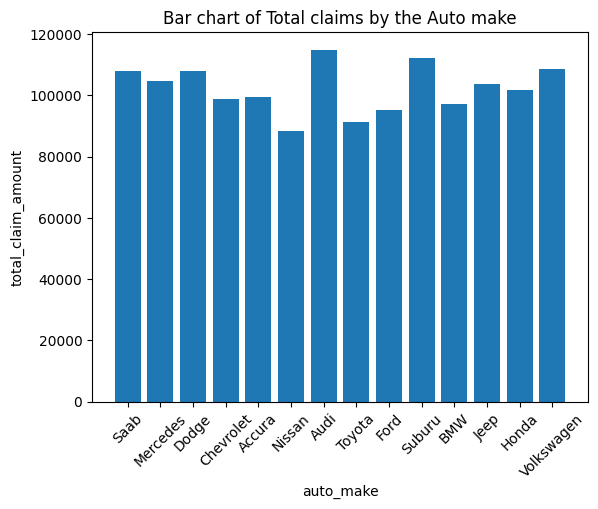

In [133]:
x_values = selected_columns['auto_make']
y_values = selected_columns['total_claim_amount']
plt.bar(x_values,y_values)
plt.xlabel('auto_make')
plt.ylabel('total_claim_amount')
plt.xticks(rotation=45)
plt.title('Bar chart of Total claims by the Auto make')
plt.show()

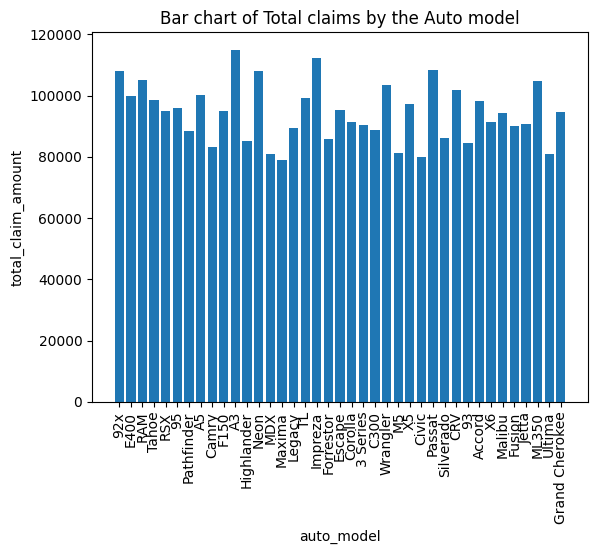

In [134]:
x_values = selected_columns['auto_model']
y_values = selected_columns['total_claim_amount']
plt.bar(x_values,y_values)
plt.xlabel('auto_model')
plt.ylabel('total_claim_amount')
plt.xticks(rotation=90)
plt.title('Bar chart of Total claims by the Auto model')
plt.show()

In [135]:
drop = selected_columns[['months_as_customer','age','total_claim_amount']]

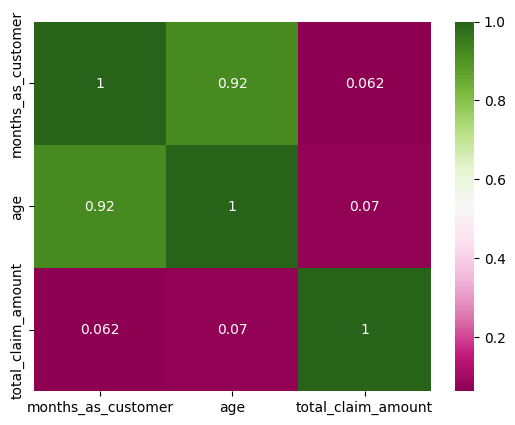

In [136]:
plt.figure
sn.heatmap(drop.corr(),annot=True,cmap='PiYG')
plt.show()

In [137]:
selected_columns['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [138]:
selected_columns['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [139]:
list = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'auto_make', 'auto_model']
for list in list:
    print('The value counts for', list, 'are:\n', selected_columns[list].value_counts())
    print('==============================')
    

The value counts for policy_state are:
 OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
The value counts for insured_sex are:
 FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
The value counts for insured_education_level are:
 JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
The value counts for insured_occupation are:
 machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
The value counts for auto_make are:
 Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW       

In [140]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'auto_make', 'auto_model']
label_encoders = {}  # Store the label encoders for later use

for column in columns_to_encode:
    # encode each column with a label encoder
    label_encoder = LabelEncoder()
    transformed_column = label_encoder.fit_transform(selected_columns[column])
    selected_columns[column] = transformed_column
    label_encoders[column] = label_encoder  # Store the label encoder for future reference

# Create a dictionary to store the dataframes
encoded_df_dict = {}

for column, encoder in label_encoders.items():
    # Create a dataframe for each column
    encoded_df = pd.DataFrame({
        'Encoded Value': range(len(encoder.classes_)),
        'Original Class': encoder.classes_
    })
    encoded_df_dict[column] = encoded_df

# Now you can access the dataframe for each column
for column, df in encoded_df_dict.items():
    print(f"For column '{column}':")
    print(df)


For column 'policy_state':
   Encoded Value Original Class
0              0             IL
1              1             IN
2              2             OH
For column 'insured_sex':
   Encoded Value Original Class
0              0         FEMALE
1              1           MALE
For column 'insured_education_level':
   Encoded Value Original Class
0              0      Associate
1              1        College
2              2    High School
3              3             JD
4              4             MD
5              5        Masters
6              6            PhD
For column 'insured_occupation':
    Encoded Value     Original Class
0               0       adm-clerical
1               1       armed-forces
2               2       craft-repair
3               3    exec-managerial
4               4    farming-fishing
5               5  handlers-cleaners
6               6  machine-op-inspct
7               7      other-service
8               8    priv-house-serv
9               9     prof

In [141]:
selected_columns

,months_as_customer,age,policy_state,insured_sex,insured_education_level,insured_occupation,auto_make,auto_model,auto_year,total_claim_amount
0,328,48,2,1,4,2,10,1,2004,71610
1,228,42,1,1,4,6,8,12,2007,5070
2,134,29,2,0,6,11,4,30,2007,34650
3,256,41,0,0,6,1,3,34,2014,63400
4,228,44,0,1,0,11,0,31,2009,6500
...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,0,5,2,6,6,2006,87200
996,285,41,0,0,6,9,13,28,2015,108480
997,130,34,2,0,5,1,11,19,1996,67500
998,458,62,0,1,0,5,1,5,1998,46980


In [27]:
# Convert categorical variables to numerical representations (one-hot encoding)
selected_columns = pd.get_dummies(selected_columns('insured_sex', 'insured_occupation','policy_state','auto_make',
                                                             'auto_model','insured_education_level','auto_year'))

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sn.heatmap(selected_columns.corr(), annot=True, cmap='PiYG')
plt.show()

TypeError: 'DataFrame' object is not callable

In [178]:
#Machine learning Algorithms

In [179]:
#Logistic Regression

In [142]:
selected_columns

,months_as_customer,age,policy_state,insured_sex,insured_education_level,insured_occupation,auto_make,auto_model,auto_year,total_claim_amount
0,328,48,2,1,4,2,10,1,2004,71610
1,228,42,1,1,4,6,8,12,2007,5070
2,134,29,2,0,6,11,4,30,2007,34650
3,256,41,0,0,6,1,3,34,2014,63400
4,228,44,0,1,0,11,0,31,2009,6500
...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,0,5,2,6,6,2006,87200
996,285,41,0,0,6,9,13,28,2015,108480
997,130,34,2,0,5,1,11,19,1996,67500
998,458,62,0,1,0,5,1,5,1998,46980


In [101]:
#Decision trees

In [144]:
selected_columns.shape

(1000, 10)

In [147]:
y

array([ 71610,   5070,  34650,  63400,   6500,  64100,  78650,  51590,
        27700,  42300,  87010, 114920,  56520,   7280,  46200,  63120,
        52110,  77880,  72930,  60400,  47160,  37840,  71520,  98160,
        77880,  71500,   9020,   5720,  69840,  91650,  75600,  67140,
        29790,  77110,  64800,  53100,  60200,   5330,  62300,  60170,
        40000,  97080,  51660,  51120,  56400,  55120,  77110,  62800,
         7290,  76600,  81800,   7260,   4300,  70510,   2640,  78900,
        56430,   2400,  65790,  62920,  69480,  44280,  56300,  68520,
        59130,  82320,  89700,  33930,  68530,   4300,  68310,  61290,
        30100,  57120,  42930,  51210,  89400,  59730,   8060,  72200,
        50800,   6600,   7500,   6490,  60940,  58300,  68400,  64240,
         4700,  45120,  66950,  98340,   5900,  70680,  93720,   6930,
        72930,  64890,   5400,   5600,  79300,  52800,  28800,   2970,
        93480,   4320,  79800,  74200,  70590,  60940,  74700,  70000,
      

In [148]:
X_train.shape

(800, 9)

In [152]:
y_train.shape

(800,)

In [154]:
X_test.shape

(200, 9)

In [155]:
X_train.shape

(800, 9)

In [143]:
#Decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = selected_columns.drop('total_claim_amount', axis=1)
y = selected_columns['total_claim_amount']

# Reshape y to a 1D array
y = np.ravel(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the decision tree classifier on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the testing data
predictions = decision_tree.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions,average='weighted', zero_division=1)
recall = recall_score(y_test, predictions, average='weighted', zero_division=1)

print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:",recall)

Accuracy: 0.0
Precision: 0.89
Recall: 0.0


59400    5
2640     4
70400    4
4320     4
44200    4
        ..
65250    1
87100    1
6240     1
66600    1
67500    1
Length: 763, dtype: int64


In [142]:
#NB

In [161]:
# Perform one-hot encoding for categorical variables if needed
df_encoded = pd.get_dummies(selected_columns)

# Separate the features (X) and target variable (y)
X = df_encoded.drop('total_claim_amount', axis=1)
y = df_encoded['total_claim_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform oversampling on the training data
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Initialize and fit the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
predictions = nb_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted', zero_division=1)
recall = recall_score(y_test, predictions, average='weighted', zero_division=1)
f1 = f1_score(y_test, predictions, average='weighted', zero_division=1)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.0
Precision: 0.94
Recall: 0.0
F1-score: 0.0


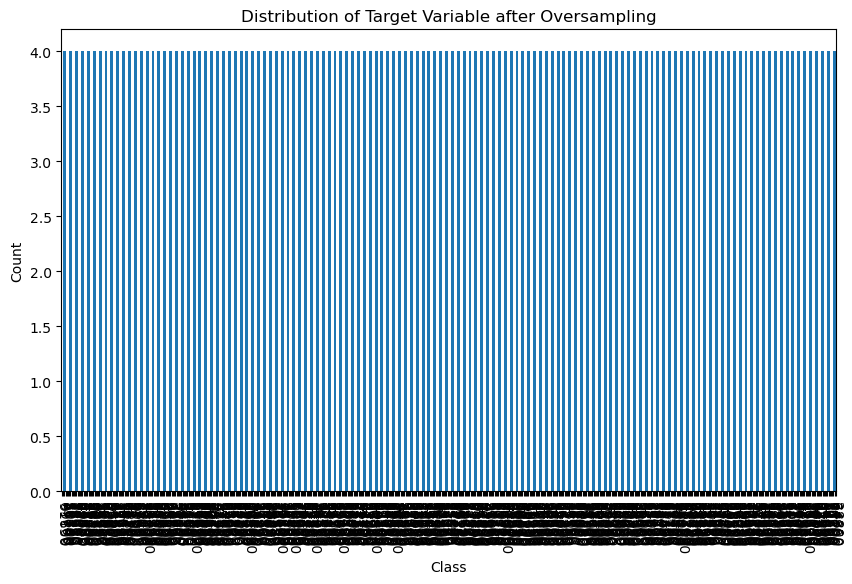

In [168]:
# Calculate the counts of each class
class_counts = y_train_resampled.value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Distribution of Target Variable after Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=270)
plt.show()

In [149]:
df_encoded = df_encoded.astype(int)


In [150]:
print(df_encoded.head())

   months_as_customer  age  auto_year  total_claim_amount  policy_state_0  \
0                 299   29          9               71610               0   
1                 212   23         12                5070               0   
2                 123   10         12               34650               0   
3                 239   22         19               63400               1   
4                 212   25         14                6500               1   

   policy_state_1  policy_state_2  insured_sex_0  insured_sex_1  \
0               0               1              0              1   
1               1               0              0              1   
2               0               1              1              0   
3               0               0              1              0   
4               0               0              0              1   

   insured_occupation_0  ...  auto_model_29  auto_model_30  auto_model_31  \
0                     0  ...              0              

In [ ]:
#random forest

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
X = selected_columns.drop('total_claim_amount', axis=1)
y = selected_columns[['total_claim_amount']]

# Reshape y to a 1D array
y = np.ravel(y)

#split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted', zero_division=1)
recall = recall_score(y_test, predictions, average='weighted', zero_division=1)
f1 = f1_score(y_test, predictions, average='weighted', zero_division=1)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.0
Precision: 0.855
Recall: 0.0
F1-score: 0.0
